In [4]:
using Revise
using HypergraphNB
using Plots
using StatsBase
using SparseArrays
using Arpack
using Kronecker: ⊗
using LinearAlgebra
using SparseArrays

┌ Info: Precompiling HypergraphNB [2dbe4ab3-0c84-4f8d-86d2-f64d6d698dce]
└ @ Base loading.jl:1260
┌ Warning: Package HypergraphNB does not have StatsBase in its dependencies:
│ - If you have HypergraphNB checked out for development and have
│   added StatsBase as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with HypergraphNB
└ Loading StatsBase into HypergraphNB from project dependency, future warnings for HypergraphNB are suppressed.


In [57]:
n  = 300
c₂ = 5
c₃ = 5
z  = 1 .+ (1:n .> n/2);

p₂ = 0.7
p₃ = 0.9

H = detectabilityData(n, c₂, c₃, p₂, p₃);

# BP Jacobian Reduction: main check

In [58]:
@time BP_mat, ix = linearizedBPMatrix(H, z);
@time E = Arpack.eigs(BP_mat; nev = 100);

  1.681239 seconds (261.93 k allocations: 287.073 MiB, 0.52% gc time)
 10.244206 seconds (8.08 k allocations: 65.339 MiB)


In [59]:
@time B_ = reducedBPJacobian(H, z);
@time E_  = Arpack.eigs(B_; nev = 100, ritzvec = true, tol = 1e-10);

  0.227156 seconds (39.31 k allocations: 6.701 MiB)
  0.436180 seconds (3.67 k allocations: 26.737 MiB)


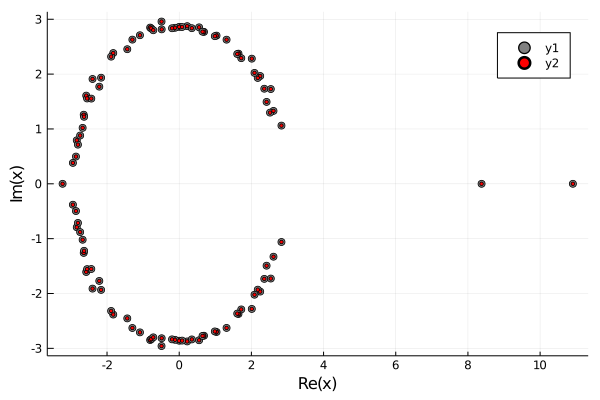

In [60]:
plot(E[1], seriestype = :scatter, color = "grey")
plot!(E_[1], seriestype = :scatter, markersize = 2, color = "red")
# plot!(xlim = (-1, 1), ylim = (-1, 1))